# Structured Data

# Problem 3



### Summary

*  Identify the various prescription patterns in which the " Target Drug " is administered or 
   prescribed to patients.
    
*  Use Unsupervised techniques such as clustering to group similar prescription patterns together.

*  Visualize these prescription patient over time to gain insights into how the drug is administered at differnent intervals.

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
#Load the & reading the train data
train_data=pd.read_parquet("train.parquet")
train_data

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


### Processing the data



In [3]:
#Filer data for patients who have taken the "Target Drug"
target_drug_patients = train_data[train_data['Incident'] == 'TARGET DRUG']['Patient-Uid'].unique()

In [4]:
#Filter the dataset for only the "Target Drug" patients
target_drug_data = train_data[train_data['Patient-Uid'].isin(target_drug_patients)]

In [5]:
#Convert the 'Data' column to Datetime
target_drug_data['Date'] = pd.to_datetime(target_drug_data['Date'])

C:\Users\ganap\AppData\Local\Temp\ipykernel_20384\1704920216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_drug_data['Date'] = pd.to_datetime(target_drug_data['Date'])


In [6]:
#Extract the month & year from the 'Date' column
target_drug_data['YearMonth'] = target_drug_data['Date'].dt.to_period('M')

C:\Users\ganap\AppData\Local\Temp\ipykernel_20384\2639249587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_drug_data['YearMonth'] = target_drug_data['Date'].dt.to_period('M')


In [7]:
#Encode the 'Incident' column using Label Encoding
le = LabelEncoder()
target_drug_data['Incident']= le.fit_transform(target_drug_data['Incident'])

C:\Users\ganap\AppData\Local\Temp\ipykernel_20384\2495129628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_drug_data['Incident']= le.fit_transform(target_drug_data['Incident'])


In [8]:
#pivot the data to get prescription per month for each patient
pivot_table = pd.pivot_table(target_drug_data, values='Incident', index = 'Patient-Uid', columns = 'YearMonth', aggfunc = 'count', fill_value = 0)

In [9]:
#perform clustering to identify prescription patterns
num_clusters = 3
kmeans = KMeans(n_clusters = num_clusters, random_state = 0)
clusters = kmeans.fit_predict(pivot_table)

C:\Users\ganap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
#Add the cluster labels to the dataset
pivot_table['Cluster'] = clusters

C:\Users\ganap\AppData\Local\Temp\ipykernel_20384\558751819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data.drop('Cluster', axis=1, inplace=True)


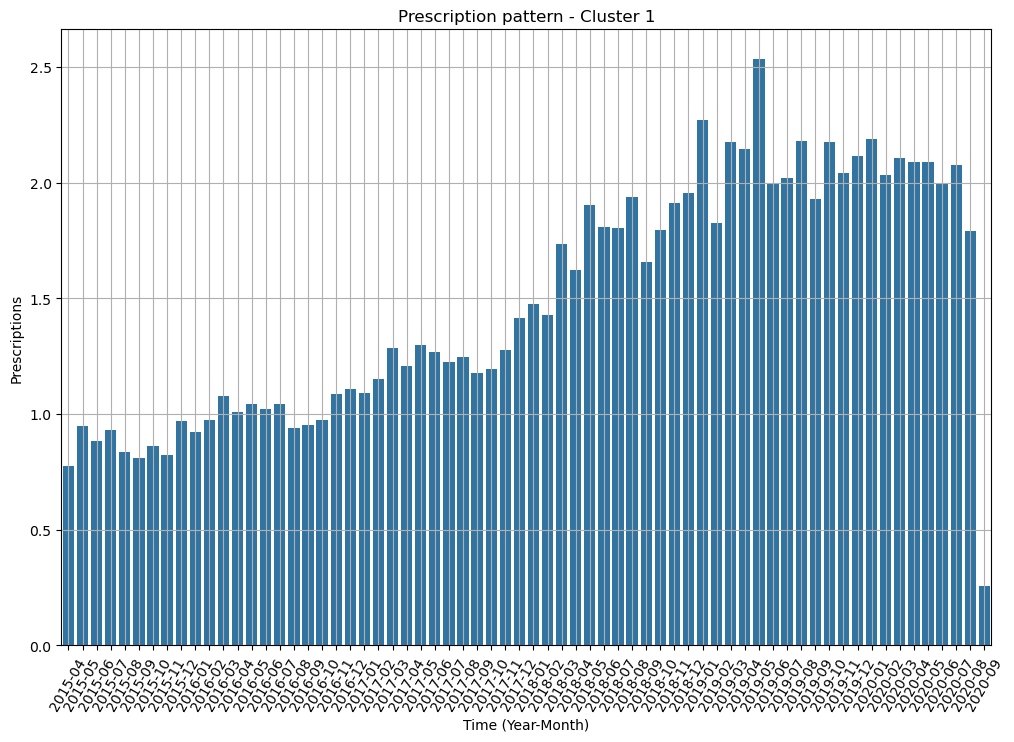

C:\Users\ganap\AppData\Local\Temp\ipykernel_20384\558751819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data.drop('Cluster', axis=1, inplace=True)


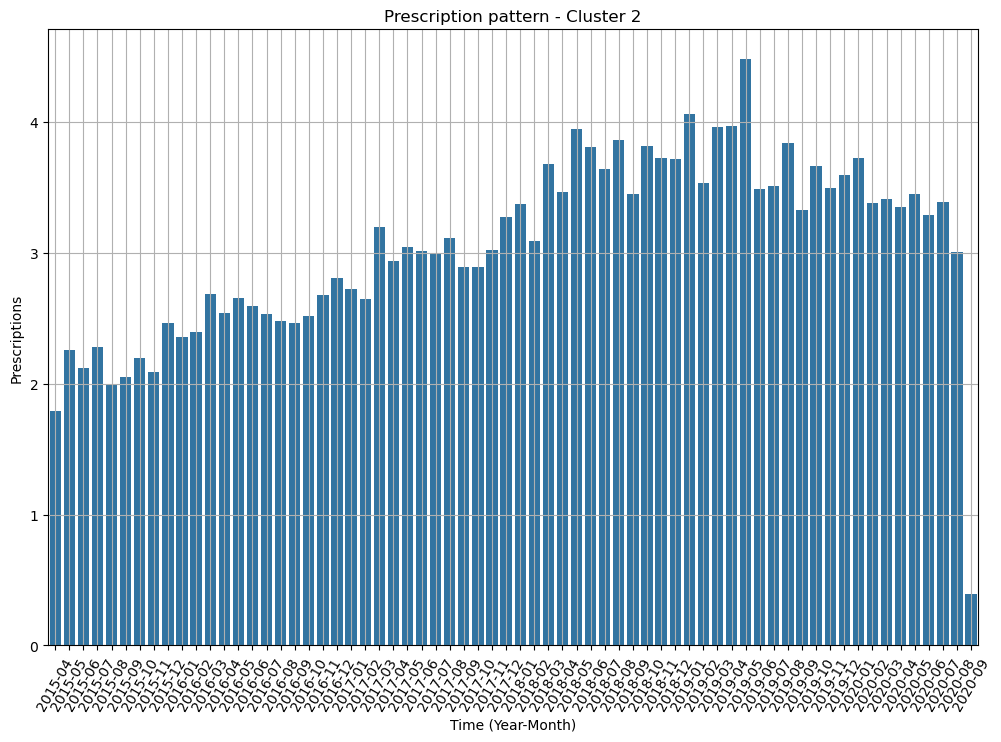

C:\Users\ganap\AppData\Local\Temp\ipykernel_20384\558751819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data.drop('Cluster', axis=1, inplace=True)


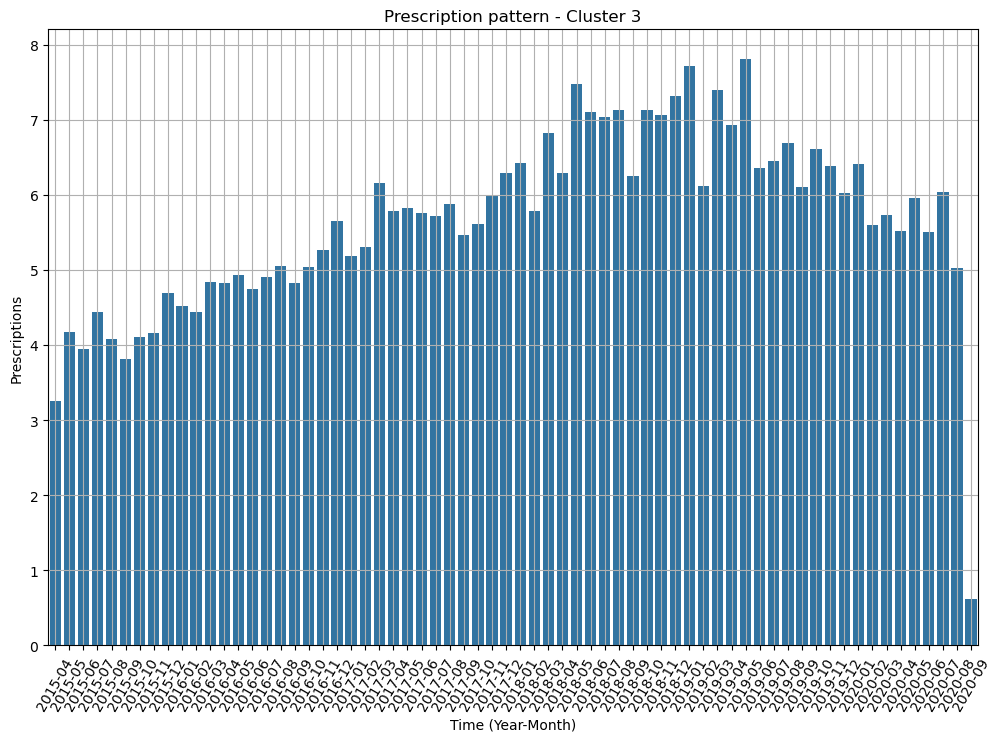

In [14]:
# Visualize the prescription patterns for each cluster
for cluster_id in range(num_clusters):
    cluster_data = pivot_table[pivot_table['Cluster'] == cluster_id]
    cluster_data.drop('Cluster', axis=1, inplace=True)
    prescription_pattern = cluster_data.mean()
    
    # Convert the 'YearMonth' to string
    prescription_pattern.index = prescription_pattern.index.astype(str)
    
    # Plot prescription pattern using Seaborn as a bar chart
    plt.figure(figsize=(12, 8))
    sns.barplot(x=prescription_pattern.index, y=prescription_pattern.values)
    plt.title(f'Prescription pattern - Cluster {cluster_id + 1}')
    plt.xlabel('Time (Year-Month)')
    plt.ylabel('Prescriptions')
    plt.xticks(rotation=60)
    plt.grid()
    plt.show()

## ____THE END____